Solution by Marceli P

Based on the 'heart.csv' dataset of measurements that classifies patients into 2 groups: 0 - no risk of heart disease, 1 - risk of disease, train a set of decision trees with a depth of 3 to 10 layers, and then choose the one that best classifies the data from the test set.

Note the elements of the dataset that are not numeric - replace them with one-hot vectors.

Save the graph of the best decision tree in a graphic file using the function tree.plot_tree (clf).

In [289]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [290]:
print(list(df))

['sex', 'age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [291]:
print(df)

        sex  age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      male   63   3       145   233    1        0      150      0      2.3   
1      male   37   2       130   250    0        1      187      0      3.5   
2    female   41   1       130   204    0        0      172      0      1.4   
3      male   56   1       120   236    0        1      178      0      0.8   
4    female   57   0       120   354    0        1      163      1      0.6   
..      ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298  female   57   0       140   241    0        1      123      1      0.2   
299    male   45   3       110   264    0        1      132      0      1.2   
300    male   68   0       144   193    1        1      141      0      3.4   
301    male   57   0       130   131    0        1      115      1      1.2   
302  female   57   1       130   236    0        0      174      0      0.0   

        slope  ca  thal  target  
0        norm   0

In [292]:
df = pd.read_csv('heart 1.csv', sep=',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,norm,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,norm,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,harmful,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,harmful,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,harmful,0,2,1


In [293]:
columns_rest = list(df)
columns_rest.remove("age")
columns_rest.remove("sex")
super_string = ('sex','age', *columns_rest)
print(super_string)

('sex', 'age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target')


In [294]:
columns_titles = ['sex','age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'] 
df=df.reindex(columns=columns_titles)
df.head()

,sex,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,male,63,3,145,233,1,0,150,0,2.3,norm,0,1,1
1,male,37,2,130,250,0,1,187,0,3.5,norm,0,2,1
2,female,41,1,130,204,0,0,172,0,1.4,harmful,0,2,1
3,male,56,1,120,236,0,1,178,0,0.8,harmful,0,2,1
4,female,57,0,120,354,0,1,163,1,0.6,harmful,0,2,1


In [295]:
y = df.iloc[:,-1].to_numpy()
X = df.iloc[:, :-1].to_numpy()
print(y)
print(X)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
[['male' 63 3 ... 'norm' 0 1]
 ['male' 37 2 ... 'norm' 0 2]
 ['female' 41 1 ... 'harmful' 0 2]
 ...
 ['male' 68 0 ... 'worrying' 2 3]
 ['male' 57 0 ... 'worrying' 1 3]
 ['female' 57 1 ... 'worrying' 1 2]]


In [296]:
unique, innverse = np.unique(X[:,0], return_inverse=True)
print(innverse)

[1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0
 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1
 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0
 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 0 1 0 1 1 1 0]


In [297]:
def make_onehot(array):
    unique, inverse = np.unique(array, return_inverse=True)
    return np.eye(unique.shape[0])[inverse]

In [298]:
X_onehot = np.hstack([make_onehot(X[:,0]), X[:,1:10], make_onehot(X[:,10]),X[:,11:]]).astype('float')
print(X_onehot)



[[ 0.  1. 63. ...  0.  0.  1.]
 [ 0.  1. 37. ...  0.  0.  2.]
 [ 1.  0. 41. ...  0.  0.  2.]
 ...
 [ 0.  1. 68. ...  1.  2.  3.]
 [ 0.  1. 57. ...  1.  1.  3.]
 [ 1.  0. 57. ...  1.  1.  2.]]


In [299]:
X_train, X_test, Y_train, Y_test = train_test_split(X_onehot,y,test_size=0.3, random_state=0)
tree_classifier = tree.DecisionTreeClassifier(random_state=0)
tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [300]:
importance = tree_classifier.feature_importances_

In [301]:
print(importance)

[0.02548383 0.02891023 0.0806071  0.27161211 0.02730411 0.07702792
 0.02866931 0.01303151 0.04739647 0.02077385 0.13115204 0.
 0.00861178 0.04013704 0.12481925 0.07446346]


In [302]:
print(tree_classifier.get_depth())

9


In [303]:
train_score = tree_classifier.score(X_train,Y_train)
test_score = tree_classifier.score(X_test,Y_test)
print(f'Train score: {train_score} \n Test score: {test_score}')

Train score: 1.0 
 Test score: 0.7362637362637363


C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


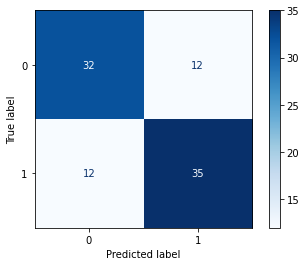

In [304]:
plot = plot_confusion_matrix(tree_classifier, X_test, Y_test, normalize=None, display_labels=[0,1],cmap=plt.cm.Blues)
plt.show()

In [305]:
classifiers, scores_train, scores_test = [],[],[]
depths= np.arange(3,11)

In [306]:
print(depths)

[ 3  4  5  6  7  8  9 10]


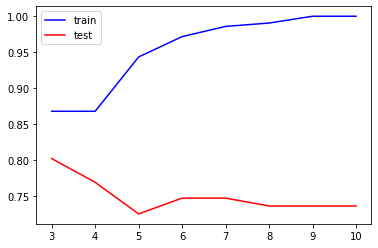

3


In [307]:
for depth in depths:
    classifier = tree.DecisionTreeClassifier(random_state=0,max_depth=depth)
    
    classifier.fit(X_train,Y_train)
    classifiers.append(classifier)
    
    scores_train.append(classifier.score(X_train,Y_train))
    scores_test.append(classifier.score(X_test,Y_test))
    
plt.plot(depths, scores_train, c='b', label='train')
plt.plot(depths, scores_test, c='r', label='test')
plt.legend()
plt.show()


print(3 + np.argmax(scores_test))

#Najlepszy 3, który jest 0 elementem obiektu classifiers
tree5 = classifiers[0]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,10), dpi=600)
tree.plot_tree(tree5)
fig.savefig('tree_clf.png')